In [0]:
# Import the machine learning libraries.
import random
import numpy as np

import matplotlib.pyplot as plt

In [0]:
# Define GridWorld class and functions.
class GridWorld():
    def __init__(self):
        self.x=0
        self.y=0
    
    def step(self, a):
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_right(self):
        self.y += 1  
        if self.y > 3:
            self.y = 3
      
    def move_left(self):
        self.y -= 1
        if self.y < 0:
            self.y = 0
      
    def move_up(self):
        self.x -= 1
        if self.x < 0:
            self.x = 0
  
    def move_down(self):
        self.x += 1
        if self.x > 3:
            self.x = 3

    def is_done(self):
        if self.x == 3 and self.y == 3:
            return True
        else :
            return False

    def get_state(self):
        return (self.x, self.y)
      
    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

In [0]:
# Define Agent class and function.
class Agent():
    def __init__(self):
        pass        

    def select_action(self):
        coin = random.random()
        if coin < 0.25:
            action = 0
        elif coin < 0.5:
            action = 1
        elif coin < 0.75:
            action = 2
        else:
            action = 3
        return action

In [0]:
# Define main function for Temporal Difference.
def main():
    env = GridWorld()
    agent = Agent()
    data = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
    gamma = 1.0
    reward = -1
    alpha = 0.001
    tot_cum_reward23 = []
    tot_cum_reward32 = []

    for k in range(50000):
        done = False

        while not done:
            x, y = env.get_state()
            action = agent.select_action()
            (x_prime, y_prime), reward, done = env.step(action)
            x_prime, y_prime = env.get_state()
            data[x][y] = data[x][y] + alpha*(reward+gamma*data[x_prime][y_prime]-data[x][y])

            if x==2 and y==3:
                tot_cum_reward23 = np.append(tot_cum_reward23, data[x][y])
            if x==3 and y==2:
                tot_cum_reward32 = np.append(tot_cum_reward32, data[x][y])

        env.reset()

    # Print the reward table.        
    for row in data:
        print(row)

    # Plot the trace of total reward in (2,3) and (3,2).
    plt.plot(tot_cum_reward23)
    plt.ylabel('Total Reward per Episode')
    plt.xlabel('Number of Episodes')
    plt.title('(2,3)')
    plt.show()

    plt.plot(tot_cum_reward32)
    plt.ylabel('Total Reward per Episode')
    plt.xlabel('Number of Episodes')
    plt.title('(3,2)')
    plt.show()

[-58.10742005327295, -56.13637670258377, -53.03814663362143, -50.54152134130257]
[-56.18059375877172, -53.43538237005254, -48.23183699604883, -43.85144168279918]
[-52.93504901397478, -48.62575164680097, -39.56177502798171, -29.332859839655658]
[-50.42394184895629, -43.39605502667931, -28.495801633133507, 0]


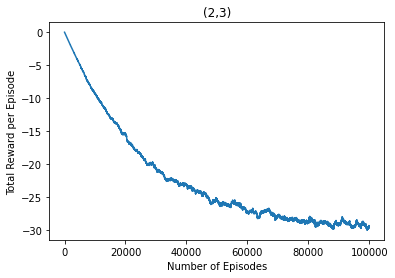

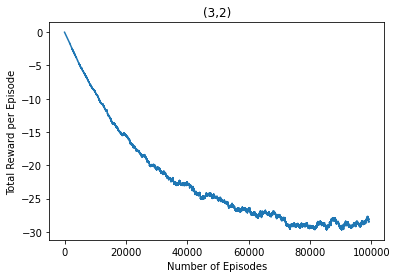

In [10]:
if __name__ == '__main__':
    main()